In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# data loading
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRT7jijFOSq-l4F4yyzexaBTrM4w1DqzzrUZD0kMk4mJELbEbMqk3xPsQkefkEZ1dGsR8DipZKWSGuO/pub?output=csv'
feedback = pd.read_csv(url)
feedback.head()

,Timestamp,In which course did you complete this module?,What is your (planned) major?,Which year are you?,What worked well for you in the module session(s)?,What didn't work so well for you?,Have you previously taken Data 8 or other data science courses?,"After participating in this module, are you considering taking Data 8 or other data science courses?",Would you like to see more modules in other courses?,How would you rate your overall experience on a scale of 1-10 (10 being best)?,Any other comments?,How would you rate the difficulty of the module from 1 (too easy) to 10 (too hard)?,How would you rate the presentation of the module from 1 (disorganized and hard to follow) to 10 (clear and organized)?,How would you rate the length of the module from 1 (too short) to 10 (too long)?,First and Last Name
0,9/6/2017 16:42:54,IAS-150,NaN,NaN,The individual help and attentiveness of our i...,My general lack of knowledge,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,9/6/2017 16:43:04,IAS-150,NaN,NaN,The content was relevant and everything was we...,"Some of it was a bit difficult, but it was doable",No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,9/6/2017 16:43:28,IAS-150,NaN,NaN,Country estimates,Coding,No,No,No,NaN,Data Science is hard,NaN,NaN,NaN,NaN
3,9/6/2017 16:44:13,IAS-150,NaN,NaN,The students teaching the module were very hel...,I feel that the module could have been more gu...,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,9/6/2017 16:44:50,IAS-150,NaN,NaN,The instructors were very helpful and some of ...,Sometimes we went through the material really ...,No,Yes,Yes,NaN,"If there were to be more modules, I think it w...",NaN,NaN,NaN,NaN


In [3]:
# renaming columns
feedback.columns = ['timestamp', 'course',
                    'major', 'year',
                    'worked',
                    'did-not-work',
                    'previous-experience',
                    'ds-after-module',
                    'more-modules',
                    'rating',
                    'comments',
                    'difficulty',
                    'presentation',
                    'length',
                    'name?']

feedback.head(2)

,timestamp,course,major,year,worked,did-not-work,previous-experience,ds-after-module,more-modules,rating,comments,difficulty,presentation,length,name?
0,9/6/2017 16:42:54,IAS-150,NaN,NaN,The individual help and attentiveness of our i...,My general lack of knowledge,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,9/6/2017 16:43:04,IAS-150,NaN,NaN,The content was relevant and everything was we...,"Some of it was a bit difficult, but it was doable",No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


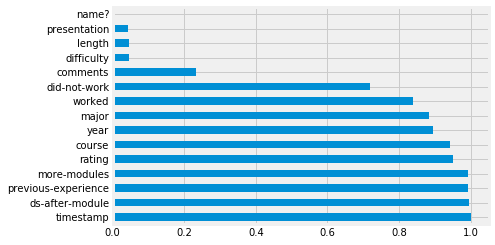

In [4]:
# proportion of each column has a response
(1 - feedback.isnull().mean().sort_values()).plot(kind='barh')

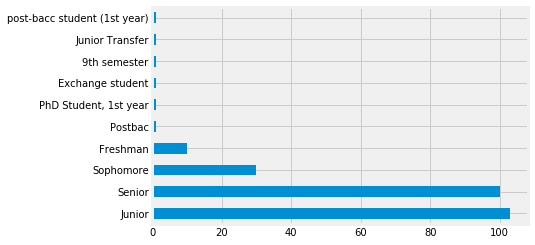

In [5]:
feedback['year'].value_counts().plot.barh()

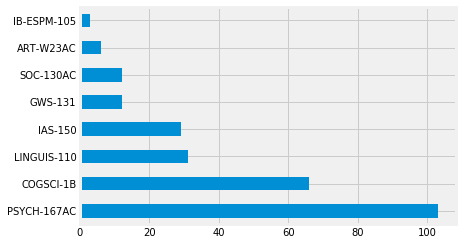

In [6]:
# number of responses for each course
feedback['course'].value_counts().plot(kind='barh')

In [7]:
feedback.describe()

,rating,difficulty,presentation,length,name?
count,264.000000,13.000000,12.000000,13.000000,0.0
mean,7.655303,6.153846,6.333333,5.461538,NaN
std,1.845385,2.703274,2.933609,1.126601,NaN
min,1.000000,2.000000,1.000000,3.000000,NaN
25%,7.000000,4.000000,4.500000,5.000000,NaN
50%,8.000000,7.000000,7.000000,5.000000,NaN
75%,9.000000,8.000000,8.250000,6.000000,NaN
max,10.000000,10.000000,10.000000,7.000000,NaN


<Container object of 3 artists>

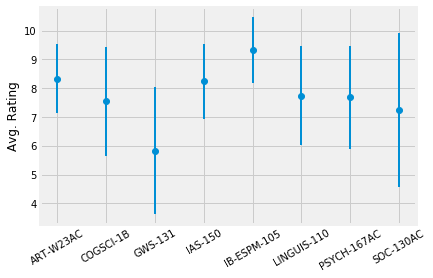

In [8]:
course = feedback.groupby('course')
x = np.arange(len(course))
y = list(feedback.groupby('course').mean()['rating'])
std = list(feedback.groupby('course').std()['rating'])
plt.xticks(x, feedback.groupby('course').mean().index, rotation=30)
plt.ylabel('Avg. Rating')

plt.errorbar(x, y, std, linestyle='None', marker='o', elinewidth=2)

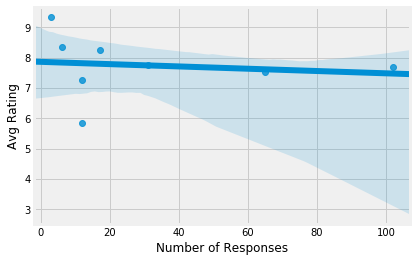

In [9]:
sns.regplot(feedback.groupby('course').count()['rating'], feedback.groupby('course').mean()['rating'])
plt.ylabel('Avg Rating')
plt.xlabel('Number of Responses')

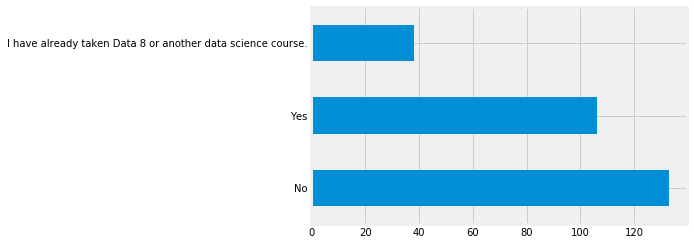

In [10]:
feedback['ds-after-module'].value_counts().plot.barh()

In [11]:
feedback['ds-after-module'].value_counts()

No                                                             133
Yes                                                            106
I have already taken Data 8 or another data science course.     38
Name: ds-after-module, dtype: int64

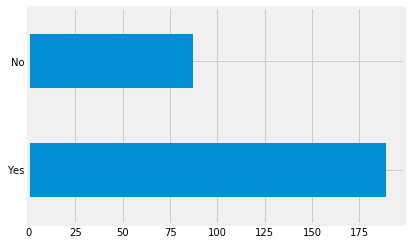

In [12]:
feedback['more-modules'].value_counts().plot.barh()

In [13]:
feedback['more-modules'].value_counts()

Yes    189
No      87
Name: more-modules, dtype: int64

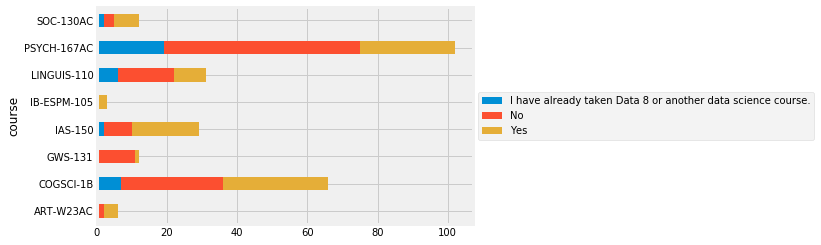

In [14]:
feedback.groupby(['course','ds-after-module'])['ds-after-module'].count().unstack().plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

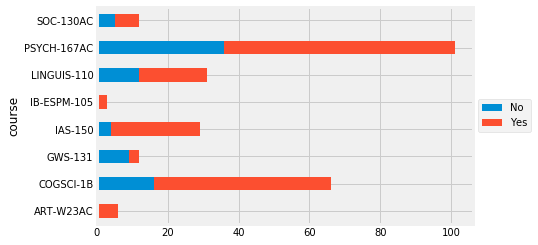

In [15]:
feedback.groupby(['course','more-modules'])['more-modules'].count().unstack().plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [16]:
def ta(text_column):

    tokens = ' '.join(feedback[text_column].dropna()).split()
    tokens_no_stop = [t.lower() for t in tokens if t.lower() not in stopwords.words("english")]

    unigrams = tokens_no_stop
    bigrams = [b for b in ngrams(tokens_no_stop, 2)]
    trigrams = [b for b in ngrams(tokens_no_stop, 3)]
    
    pd.DataFrame(Counter(unigrams).most_common(10)).plot.barh(0,1,)
    plt.show()
    
    print("Most common bigrams:\n")
    print(Counter(bigrams).most_common(10))
    
    print("\nMost common trigrams:\n")
    print(Counter(trigrams).most_common(10))

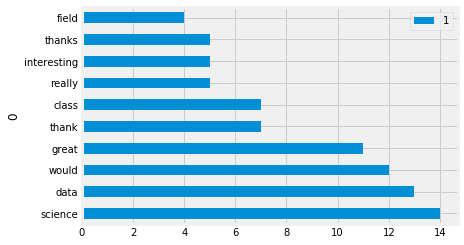

Most common bigrams:

[(('data', 'science'), 11), (("i'm", 'sure'), 3), (('think', 'would'), 2), (('computer', 'science'), 2), (('taking', 'data'), 2), (('science', 'hard'), 1), (('hard', 'modules,'), 1), (('modules,', 'think'), 1), (('would', 'need'), 1), (('need', 'slowed'), 1)]

Most common trigrams:

[(('taking', 'data', 'science'), 2), (('data', 'science', 'hard'), 1), (('science', 'hard', 'modules,'), 1), (('hard', 'modules,', 'think'), 1), (('modules,', 'think', 'would'), 1), (('think', 'would', 'need'), 1), (('would', 'need', 'slowed'), 1), (('need', 'slowed', 'bit.'), 1), (('slowed', 'bit.', 'computer'), 1), (('bit.', 'computer', 'science'), 1)]


In [17]:
ta('comments')

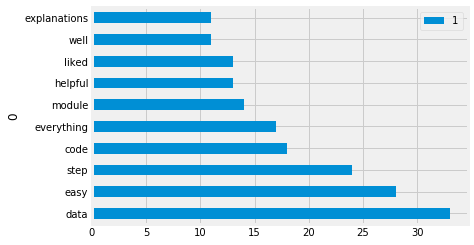

Most common bigrams:

[(('step', 'step'), 12), (('easy', 'follow.'), 6), (('worked', 'well'), 4), (('easy', 'follow'), 4), (('see', 'data'), 4), (('helped', 'understand'), 3), (('data', 'science'), 3), (('easy', 'navigate'), 3), (('easy', 'use'), 3), (('everything', 'worked'), 3)]

Most common trigrams:

[(('able', 'see', 'data'), 2), (('individual', 'help', 'attentiveness'), 1), (('help', 'attentiveness', 'instructors'), 1), (('attentiveness', 'instructors', 'content'), 1), (('instructors', 'content', 'relevant'), 1), (('content', 'relevant', 'everything'), 1), (('relevant', 'everything', 'well'), 1), (('everything', 'well', 'thought'), 1), (('well', 'thought', 'country'), 1), (('thought', 'country', 'estimates'), 1)]


In [18]:
ta('worked')

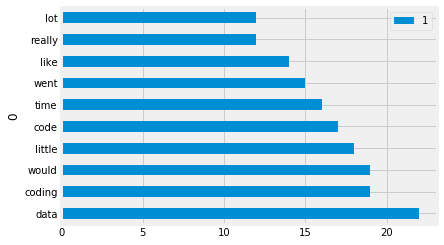

Most common bigrams:

[(('feel', 'like'), 5), (('hard', 'understand'), 5), (('enough', 'time'), 4), (('little', 'fast'), 4), (('little', 'bit'), 3), (('would', 'better'), 3), (('hard', 'time'), 3), (('hard', 'follow'), 3), (('would', 'nice'), 3), (("don't", 'know'), 3)]

Most common trigrams:

[(('went', 'little', 'fast'), 3), (('would', 'nice', 'able'), 2), (('general', 'lack', 'knowledge'), 1), (('lack', 'knowledge', 'bit'), 1), (('knowledge', 'bit', 'difficult,'), 1), (('bit', 'difficult,', 'doable'), 1), (('difficult,', 'doable', 'coding'), 1), (('doable', 'coding', 'feel'), 1), (('coding', 'feel', 'module'), 1), (('feel', 'module', 'could'), 1)]


In [19]:
ta('did-not-work')

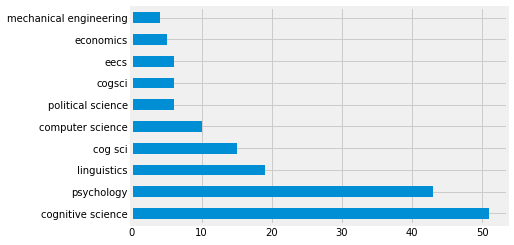

In [20]:
feedback['major'].dropna().str.lower().str.strip().value_counts()[:10].plot.barh()